In [19]:
#using Pkg
#Pkg.develop("JWAS")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Cloning git-repo `https://github.com/reworkhow/JWAS.jl.git`
  Updating git-repo `https://github.com/reworkhow/JWAS.jl.git`


┌ Info: Path `/home/jovyan/rohan/JuliaDev/JWAS` exists and looks like the correct package, using existing path instead of cloning
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v0.7/Pkg/src/Types.jl:573


 Resolving package versions...
 Installed Arpack ─────────── v0.3.0
 Installed TableTraits ────── v0.4.0
 Installed Parsers ────────── v0.2.11
 Installed MbedTLS ────────── v0.6.6
 Installed SpecialFunctions ─ v0.7.2
 Installed Tables ─────────── v0.1.10
 Installed Colors ─────────── v0.9.5
 Installed CodecZlib ──────── v0.5.1
 Installed CSV ────────────── v0.4.2
 Installed GR ─────────────── v0.35.0
  Updating `~/.julia/environments/v0.7/Project.toml`
  [336ed68f] ↑ CSV v0.4.1 ⇒ v0.4.2
  [c9a035f4] ↑ JWAS v0.4.1+ #master (https://github.com/reworkhow/JWAS.jl.git) ⇒ v0.4.2+ [`~/rohan/JuliaDev/JWAS`]
  Updating `~/.julia/environments/v0.7/Manifest.toml`
  [7d9fca2a] ↑ Arpack v0.2.3 ⇒ v0.3.0
  [336ed68f] ↑ CSV v0.4.1 ⇒ v0.4.2
  [944b1d66] ↑ CodecZlib v0.5.0 ⇒ v0.5.1
  [5ae59095] ↑ Colors v0.9.4 ⇒ v0.9.5
  [28b8d3ca] ↑ GR v0.34.1 ⇒ v0.35.0
  [c9a035f4] ↑ JWAS v0.4.1+ #master (https://github.com/reworkhow/JWAS.jl.git) ⇒ v0.4.2+ [`~/rohan/JuliaDev/JWAS`]
  [739be429] ↑ MbedTLS v0.6.3 ⇒ v0.6

In [1]:
using JWAS,CSV,DataFrames,LinearAlgebra,Statistics,Random,DelimitedFiles
using Distributions
using Printf

In [2]:
phenofile  = "phenotypes.txt"
genofile   = "genotypes.txt"
df = readtable(genofile,header=false)
headerMarkers = [df[1,i] for i=2:size(df,2)]
id = string.(df[2:end,1]);

┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = ip:0x0
└ @ Core :-1


In [5]:
head(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,x305,x306,x307,x308,x309,x310,x311,x312,x313,x314,x315,x316,x317,x318,x319,x320,x321,x322,x323,x324,x325,x326,x327,x328,x329,x330,x331,x332,x333,x334,x335,x336,x337,x338,x339,x340,x341,x342,x343,x344,x345,x346,x347,x348,x349,x350,x351,x352,x353,x354,x355,x356,x357,x358,x359,x360,x361,x362,x363,x364,x365,x366,x367,x368,x369,x370,x371,x372,x373,x374,x375,x376,x377,x378,x379,x380,x381,x382,x383,x384,x385,x386,x387,x388,x389,x390,x391,x392,x393,x394,x395,x396,x397,x398,x399,x400,x401,x402,x403,x404,x405,x406,x407,x408,x409,x410,x411,x412,x413,x414,x415,x416,x417,x418,x419,x420,x421,x422,x423,x424,x425,x426,x427,x428,x429,x430,x431,x432,x433,x434,x435,x436,x437,x438,x439,x440,x441,x442,x443,x444,x445,x446,x447,x448,x449,x450,x451,x452,x453,x454,x455,x456,x457,x458,x459,x460,x461,x462,x463,x464,x465,x466,x467,x468,x469,x470,x471,x472,x473,x474,x475,x476,x477,x478,x479,x480,x481,x482,x483,x484,x485,x486,x487,x488,x489,x490,x491,x492,x493,x494,x495,x496,x497,x498,x499,x500,x501,x502,x503,x504,x505,x506,x507,x508,x509,x510,x511,x512,x513,x514,x515,x516,x517,x518,x519,x520,x521,x522,x523,x524,x525,x526,x527,x528,x529,x530,x531,x532,x533,x534,x535,x536,x537,x538,x539,x540,x541,x542,x543,x544,x545,x546,x547,x548,x549,x550,x551,x552,x553,x554,x555,x556,x557,x558,x559,x560,x561,x562,x563,x564,x565,x566,x567,x568,x569,x570,x571,x572,x573,x574,x575,x576,x577,x578,x579,x580,x581,x582,x583,x584,x585,x586,x587,x588,x589,x590,x591,x592,x593,x594,x595,x596,x597,x598,x599,x600,x601,x602,x603,x604,x605,x606,x607,x608,x609,x610,x611,x612,x613,x614,x615,x616,x617,x618,x619,x620,x621,x622,x623,x624,x625,x626,x627,x628,x629,x630,x631,x632,x633,x634,x635,x636,x637,x638,x639,x640,x641,x642,x643,x644,x645,x646,x647,x648,x649,x650,x651,x652,x653,x654,x655,x656,x657,x658,x659,x660,x661,x662,x663,x664,x665,x666,x667,x668,x669,x670,x671,x672,x673,x674,x675,x676,x677,x678,x679,x680,x681,x682,x683,x684,x685,x686,x687,x688,x689,x690,x691,x692,x693,x694,x695,x696,x697,x698,x699,x700,x701,x702,x703,x704,x705,x706,x707,x708,x709,x710,x711,x712,x713,x714,x715,x716,x717,x718,x719,x720,x721,x722,x723,x724,x725,x726,x727,x728,x729,x730,x731,x732,x733,x734,x735,x736,x737,x738,x739,x740,x741,x742,x743,x744,x745,x746,x747,x748,x749,x750,x751,x752,x753,x754,x755,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767,x768,x769,x770,x771,x772,x773,x774,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784,x785,x786,x787,x788,x789,x790,x791,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x8

In [6]:
M=convert(Array{Float64,2},readtable(genofile)[:,2:end])
phenotypes = readtable(phenofile);

┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = top-level scope at In[6]:1
└ @ Core In[6]:1
┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at In[6]:1
└ @ Core In[6]:1
┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = top-level scope at In[6]:2
└ @ Core In[6]:2


In [8]:
M

599×1279 Array{Float64,2}:
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  …  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  0.0  0.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     0.0  0.0  0.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     1.0  0.0  0.0  1.0  0.0  1.0  0.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     1.0  1.0  0.0  0.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  …  1.0  0.0  0.0  0.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0     1.0  0.0  0.0  0.0  0.0  1.0  1.0
 1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0     1.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  1.0  1.0  1.0
 0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  1.0  0.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  …  1.0  1.0  0.0  0.0  1.0  1.0  1.0
 1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0     1.0  1.0  0.0  1.0  0.0  1.0  1.0
 0.0  1.0  0.0  1.0  1.0  1.0  1.0  0

In [9]:
head(phenotypes)

,id,y1,y2,y3,y4
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,1,1.67163,-1.72747,-1.89028,0.0509159
2,2,-0.252703,0.409522,0.309386,-1.73876
3,3,0.341815,-0.648626,-0.799559,-1.05357
4,4,0.785439,0.0939492,0.570468,0.551757
5,5,0.998318,-0.282481,1.61868,-0.114285
6,6,2.3361,0.626476,0.0735331,0.719586


In [10]:
mStd = std(M,dims=1) #rowSttev
M = M ./ mStd; #divide each row by

In [12]:
mStd

1×1279 Array{Float64,2}:
 0.477552  0.249846  0.484257  0.370227  …  0.482923  0.433615  0.2183

In [13]:
size(M)

(599, 1279)

In [14]:
var(M,dims=1)

1×1279 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [15]:
function getTrnValSets(N,trnSize)
    # N is the size of the data set
    trnSet = sort(sample(1:N,trnSize,replace=false))
    mask = trues(N)
    mask[trnSet] .= false
    valSet = (1:N)[mask]
    return trnSet,valSet
end

getTrnValSets (generic function with 1 method)

The "sample" function can be used to get a random sample from and array of objects. Some examples:

In [16]:
sample([45,"a",1,1,2,2,3],5,replace=false)

5-element Array{Any,1}:
   "a"
  3   
  1   
 45   
  2   

sample(1:8,5,replace=false)

In [18]:
getTrnValSets(10,5)

([1, 5, 6, 8, 10], [2, 3, 4, 7, 9])

In [19]:
trn, val = getTrnValSets(10,5)
trn

5-element Array{Int64,1}:
  1
  3
  8
  9
 10

In [20]:
val

5-element Array{Int64,1}:
 2
 4
 5
 6
 7

In [21]:
res = getTrnValSets(10,5)
res[1]

5-element Array{Int64,1}:
  1
  2
  5
  8
 10

In [22]:
res[2] 

5-element Array{Int64,1}:
 3
 4
 6
 7
 9

In [24]:
model_equation = "y1 = intercept
                  y2 = intercept"

R     = [0.5301922 -0.2248727
        -0.2248727  0.5724733]

G = [ 3.462704e-05 -2.076392e-05
     -2.076392e-05  3.059811e-05] .* 12


trnSize = 300
N = size(phenotypes,1)
resFile = open("wheatCorrelations","w")

IOStream(<file wheatCorrelations>)

In [25]:
G

2×2 Array{Float64,2}:
  0.000415524  -0.000249167
 -0.000249167   0.000367177

In [26]:
for i=1:10
    println("\n Iteration: ",i,"\n")
    trnSet,valSet = getTrnValSets(N,trnSize)
    
    ### BayesL ###
    model = build_model(model_equation,R)
    add_genotypes(model,M[trnSet,:],G,header=headerMarkers,rowID=id[trnSet],G_is_marker_variance=true);
    out=runMCMC(model,phenotypes,methods="BayesL",
            chain_length = 50_000,
            burnin = 1_000,
            estimatePi = false,
            printout_frequency = 10_000,
            output_samples_frequency = 0
    )
    ebv1 = M[valSet,:]*out["Posterior mean of marker effects"][1][:,2] 
    ebv2 = M[valSet,:]*out["Posterior mean of marker effects"][2][:,2] 

    y1 = convert(Array,phenotypes[valSet,2])
    y2 = convert(Array,phenotypes[valSet,3])
    corL1 = cor(y1,ebv1)
    corL2 = cor(y2,ebv2)
    
    ### BayesC0 ###
    model = build_model(model_equation,R)
    add_genotypes(model,M[trnSet,:],G,header=headerMarkers,rowID=id[trnSet],G_is_marker_variance=true);
    out=runMCMC(model,phenotypes,methods="RR-BLUP",
            chain_length = 50_000,
            burnin = 1_000,
            estimatePi = false,
            printout_frequency = 10_000,
            output_samples_frequency = 0
    )
    ebv1 = M[valSet,:]*out["Posterior mean of marker effects"][1][:,2]
    ebv2 = M[valSet,:]*out["Posterior mean of marker effects"][2][:,2]
    y1 = convert(Array,phenotypes[valSet,2])
    y2 = convert(Array,phenotypes[valSet,3])
    corC01 = cor(y1,ebv1)
    corC02 = cor(y2,ebv2)
    
    ### BayesC ###
    π1 = 0.5
    Pi = Dict([1.0; 1.0]=>(1-π1)^2,[1.0; 0.0]=>(1-π1)*π1,[0.0; 1.0]=>(1-π1)*π1,[0.0; 0.0]=>π1*π1)
    model = build_model(model_equation,R)
    add_genotypes(model,M[trnSet,:],G,header=headerMarkers,rowID=id[trnSet],G_is_marker_variance=true);
    out=runMCMC(model,phenotypes,methods="BayesC",
            chain_length = 50_000,
            burnin = 1_000,
            Pi = Pi,
            estimatePi = true,
            printout_frequency = 10_000,
            output_samples_frequency = 0
    )
    ebv1 = M[valSet,:]*out["Posterior mean of marker effects"][1][:,2]
    ebv2 = M[valSet,:]*out["Posterior mean of marker effects"][2][:,2]
    y1 = convert(Array,phenotypes[valSet,2])
    y2 = convert(Array,phenotypes[valSet,3])
    corC1 = cor(y1,ebv1)
    corC2 = cor(y2,ebv2)

    @printf(resFile,"%4.2f %4.2f %4.2f %4.2f %4.2f %4.2f\n",corL1,corL2,corC01, corC02, corC1, corC2)
    flush(resFile) #print immediately
    end
end
close(resFile)


 Iteration: 1

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constr

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:36


Posterior means at iteration: 10000
Residual covariance matrix: 


running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:36

[0.642091 0.08984; 0.08984 0.580399]
Marker effects covariance matrix: 
[2.2e-5 -1.1e-5; -1.1e-5 2.6e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:10


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.639689 0.089302; 0.089302 0.582342]
Marker effects covariance matrix: 
[2.2e-5 -1.2e-5; -1.2e-5 2.6e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:46


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.637211 0.089401; 0.089401 0.583972]
Marker effects covariance matrix: 
[2.3e-5 -1.2e-5; -1.2e-5 2.6e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:23


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.636763 0.088646; 0.088646 0.583489]
Marker effects covariance matrix: 
[2.3e-5 -1.1e-5; -1.1e-5 2.6e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.638721 0.088873; 0.088873 0.58324]
Marker effects covariance matrix: 
[2.2e-5 -1.1e-5; -1.1e-5 2.6e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:55


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:18


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.643701 0.088944; 0.088944 0.591065]
Marker effects covariance matrix: 
[0.000258 -0.000134; -0.000134 0.000293]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:59


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.643358 0.08801; 0.08801 0.592362]
Marker effects covariance matrix: 
[0.000259 -0.000132; -0.000132 0.00029]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:40


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.642445 0.089164; 0.089164 0.591082]
Marker effects covariance matrix: 
[0.000263 -0.000135; -0.000135 0.000294]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:20


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.642709 0.08892; 0.08892 0.58965]
Marker effects covariance matrix: 
[0.000262 -0.000135; -0.000135 0.000296]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.64364 0.089009; 0.089009 0.587639]
Marker effects covariance matrix: 
[0.00026 -0.000135; -0.000135 0.0003]



running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:39


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint                                    false
missing_phenotypes                            false
update_prio

running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:42


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.642354 0.080141; 0.080141 0.577371]
Marker effects covariance matrix: 
[0.000437 -0.000364; -0.000364 0.000603]
π: 
Dict

running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:42

([0.0, 0.0]=>0.193899,[1.0, 0.0]=>0.239212,[1.0, 1.0]=>0.360044,[0.0, 1.0]=>0.206845)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:46


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.640394 0.08186; 0.08186 0.580544]
Marker effects covariance matrix: 
[0.000433 -0.000364; -0.000364 0.000579]
π: 
Dict([0.0, 0.0]=>0.153274,[1.0, 0.0]=>0.255945,[1.0, 1.0]=>0.371571,[0.0, 1.0]=>0.219209)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:50


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.640637 0.082529; 0.082529 0.579539]
Marker effects covariance matrix: 
[0.000466 -0.000377; -0.000377 0.000562]
π: 
Dict([0.0, 0.0]=>0.155463,[1.0, 0.0]=>0.230455,[1.0, 1.0]=>0.376737,[0.0, 1.0]=>0.237345)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:55


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.641286 0.083431; 0.083431 0.581203]
Marker effects covariance matrix: 
[0.000484 -0.000381; -0.000381 0.000552]
π: 
Dict([0.0, 0.0]=>0.166514,[1.0, 0.0]=>0.21778,[1.0, 1.0]=>0.383017,[0.0, 1.0]=>0.232689)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.640168 0.082617; 0.082617 0.581034]
Marker effects covariance matrix: 
[0.000504 -0.000392; -0.000392 0.000547]
π: 
Dict([0.0, 0.0]=>0.163066,[1.0, 0.0]=>0.219245,[1.0, 1.0]=>0.365628,[0.0, 1.0]=>0.252061)



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:38



 Iteration: 2

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constr

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:31


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.589217 0.132416; 0.132416 0.542563]
Marker effects covariance matrix: 
[2.6e-5 -1.4e-5; -1.4e-5 2.7e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:08


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.591307 0.134533; 0.134533 0.546086]
Marker effects covariance matrix: 
[2.6e-5 -1.4e-5; -1.4e-5 2.6e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:45


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.590586 0.134805; 0.134805 0.544163]
Marker effects covariance matrix: 
[2.6e-5 -1.4e-5; -1.4e-5 2.7e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:23


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.589273 0.133439; 0.133439 0.54567]
Marker effects covariance matrix: 
[2.6e-5 -1.4e-5; -1.4e-5 2.6e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.589654 0.134507; 0.134507 0.545926]
Marker effects covariance matrix: 
[2.6e-5 -1.4e-5; -1.4e-5 2.7e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:53


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:18


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.586254 0.135165; 0.135165 0.547576]
Marker effects covariance matrix: 
[0.000321 -0.000173; -0.000173 0.000319]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:58


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.588595 0.135188; 0.135188 0.548457]
Marker effects covariance matrix: 
[0.000319 -0.000173; -0.000173 0.000316]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:39


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.589899 0.133426; 0.133426 0.547611]
Marker effects covariance matrix: 
[0.000317 -0.000169; -0.000169 0.000316]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:19


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.5905 0.134053; 0.134053 0.547159]
Marker effects covariance matrix: 
[0.000316 -0.000172; -0.000172 0.000318]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.590073 0.134322; 0.134322 0.547616]
Marker effects covariance matrix: 
[0.000318 -0.000172; -0.000172 0.000317]

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                   

running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:36
running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:41


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.583485 0.118413; 0.118413 0.534185]
Marker effects covariance matrix: 
[0.000588 -0.000533; -0.000533 0.000709]
π: 
Dict([0.0, 0.0]=>0.177521,[1.0, 0.0]=>0.246486,[1.0, 1.0]=>0.331797,[0.0, 1.0]=>0.244195)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:46


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.579933 0.116259; 0.116259 0.530865]
Marker effects covariance matrix: 
[0.000712 -0.0006; -0.0006 0.000734]
π: 
Dict([0.0, 0.0]=>0.234739,[1.0, 0.0]=>0.229241,[1.0, 1.0]=>0.285013,[0.0, 1.0]=>0.251006)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:51


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.581602 0.116913; 0.116913 0.532462]
Marker effects covariance matrix: 
[0.000653 -0.000547; -0.000547 0.000694]
π: 
Dict([0.0, 0.0]=>0.208058,[1.0, 0.0]=>0.238386,[1.0, 1.0]=>0.309865,[0.0, 1.0]=>0.24369)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:56


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.580973 0.117997; 0.117997 0.532501]
Marker effects covariance matrix: 
[0.000652 -0.000532; -0.000532 0.000666]
π: 
Dict([0.0, 0.0]=>0.203306,[1.0, 0.0]=>0.229568,[1.0, 1.0]=>0.323371,[0.0, 1.0]=>0.243755)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.5806 0.118508; 0.118508 0.531521]
Marker effects covariance matrix: 
[0.000666 -0.000528; -0.000528 0.000654]
π: 
Dict([0.0, 0.0]=>0.196194,[1.0, 0.0]=>0.226591,[1.0, 1.0]=>0.329402,[0.0, 1.0]=>0.247814)



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:37



 Iteration: 3

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constr

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:30


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.59789 0.101507; 0.101507 0.743084]
Marker effects covariance matrix: 
[2.6e-5 -1.0e-5; -1.0e-5 2.3e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:08


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.599311 0.096835; 0.096835 0.731846]
Marker effects covariance matrix: 
[2.6e-5 -1.0e-5; -1.0e-5 2.4e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:46


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.598832 0.097079; 0.097079 0.735053]
Marker effects covariance matrix: 
[2.6e-5 -1.0e-5; -1.0e-5 2.3e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:23


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.597637 0.095171; 0.095171 0.732101]
Marker effects covariance matrix: 
[2.6e-5 -1.0e-5; -1.0e-5 2.4e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.596314 0.095296; 0.095296 0.732782]
Marker effects covariance matrix: 
[2.6e-5 -1.0e-5; -1.0e-5 2.4e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:54


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:16


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.594797 0.092544; 0.092544 0.723995]
Marker effects covariance matrix: 
[0.000326 -0.000113; -0.000113 0.000299]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:56


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.593745 0.091604; 0.091604 0.732943]
Marker effects covariance matrix: 
[0.000325 -0.000108; -0.000108 0.000282]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:37


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.590205 0.089637; 0.089637 0.732926]
Marker effects covariance matrix: 
[0.00033 -0.000106; -0.000106 0.000283]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:19


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.591294 0.090481; 0.090481 0.732314]
Marker effects covariance matrix: 
[0.000327 -0.000106; -0.000106 0.000283]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.591905 0.090635; 0.090635 0.734799]
Marker effects covariance matrix: 
[0.000327 -0.000106; -0.000106 0.000279]



running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:33


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint                                    false
missing_phenotypes                            false
update_prio

running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:27


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.594059 0.084499; 0.084499 0.721394]
Marker effects covariance matrix: 
[0.000849 -0.000532; -0.000532 0.00059]
π: 
Dict([0.0, 0.0]=>0.245008,[1.0, 0.0]=>0.223583,[1.0, 1.0]=>0.254009,[0.0, 1.0]=>0.277399)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:35


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.598605 0.092692; 0.092692 0.727723]
Marker effects covariance matrix: 
[0.000688 -0.000434; -0.000434 0.000516]
π: 
Dict([0.0, 0.0]=>0.197594,[1.0, 0.0]=>0.209164,[1.0, 1.0]=>0.337748,[0.0, 1.0]=>0.255493)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:44


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.596198 0.088287; 0.088287 0.728718]
Marker effects covariance matrix: 
[0.00063 -0.00038; -0.00038 0.000524]
π: 
Dict([0.0, 0.0]=>0.175775,[1.0, 0.0]=>0.240169,[1.0, 1.0]=>0.344224,[0.0, 1.0]=>0.239832)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:52


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.596127 0.088651; 0.088651 0.730183]
Marker effects covariance matrix: 
[0.000635 -0.000405; -0.000405 0.000534]
π: 
Dict([0.0, 0.0]=>0.176805,[1.0, 0.0]=>0.246542,[1.0, 1.0]=>0.326545,[0.0, 1.0]=>0.250109)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.595279 0.0879; 0.0879 0.731588]
Marker effects covariance matrix: 
[0.000626 -0.000412; -0.000412 0.000542]
π: 
Dict([0.0, 0.0]=>0.172671,[1.0, 0.0]=>0.26146,[1.0, 1.0]=>0.312423,[0.0, 1.0]=>0.253447)



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:19



 Iteration: 4

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constr

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:25


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.564152 0.071295; 0.071295 0.693437]
Marker effects covariance matrix: 
[2.8e-5 -9.0e-6; -9.0e-6 2.6e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:04


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.565247 0.074078; 0.074078 0.698327]
Marker effects covariance matrix: 
[2.7e-5 -9.0e-6; -9.0e-6 2.5e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:43


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.563165 0.075669; 0.075669 0.695087]
Marker effects covariance matrix: 
[2.8e-5 -9.0e-6; -9.0e-6 2.6e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:21


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.563632 0.074628; 0.074628 0.694234]
Marker effects covariance matrix: 
[2.8e-5 -9.0e-6; -9.0e-6 2.6e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.563045 0.07473; 0.07473 0.693935]
Marker effects covariance matrix: 
[2.8e-5 -9.0e-6; -9.0e-6 2.6e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:47


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:13


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.558784 0.067875; 0.067875 0.690723]
Marker effects covariance matrix: 
[0.00034 -9.8e-5; -9.8e-5 0.000318]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:55


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.559593 0.07042; 0.07042 0.694629]
Marker effects covariance matrix: 
[0.000339 -0.000101; -0.000101 0.000312]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:36


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.559732 0.072121; 0.072121 0.6925]
Marker effects covariance matrix: 
[0.00034 -0.000105; -0.000105 0.000317]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:18


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.560006 0.072502; 0.072502 0.693675]
Marker effects covariance matrix: 
[0.000339 -0.000106; -0.000106 0.000314]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.559613 0.073193; 0.073193 0.692447]
Marker effects covariance matrix: 
[0.000341 -0.000108; -0.000108 0.000317]

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                   

running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:31
running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:27


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.548423 0.07693; 0.07693 0.677303]
Marker effects covariance matrix: 
[0.000707 -0.000593; -0.000593 0.000731]
π: 
Dict([0.0, 0.0]=>0.166123,[1.0, 0.0]=>0.326142,[1.0, 1.0]=>0.226145,[0.0, 1.0]=>0.28159)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:36


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.554891 0.07402; 0.07402 0.683023]
Marker effects covariance matrix: 
[0.000685 -0.000569; -0.000569 0.000703]
π: 
Dict([0.0, 0.0]=>0.17527,[1.0, 0.0]=>0.317728,[1.0, 1.0]=>0.229251,[0.0, 1.0]=>0.277751)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:44


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.55662 0.064717; 0.064717 0.681516]
Marker effects covariance matrix: 
[0.000671 -0.000416; -0.000416 0.000682]
π: 
Dict([0.0, 0.0]=>0.16541,[1.0, 0.0]=>0.308224,[1.0, 1.0]=>0.254407,[0.0, 1.0]=>0.271959)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:52


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.556075 0.066638; 0.066638 0.679506]
Marker effects covariance matrix: 
[0.000657 -0.00046; -0.00046 0.000735]
π: 
Dict([0.0, 0.0]=>0.171123,[1.0, 0.0]=>0.320886,[1.0, 1.0]=>0.253173,[0.0, 1.0]=>0.254818)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.556687 0.068092; 0.068092 0.679746]
Marker effects covariance matrix: 
[0.000659 -0.000483; -0.000483 0.00076]
π: 
Dict([0.0, 0.0]=>0.18304,[1.0, 0.0]=>0.326642,[1.0, 1.0]=>0.242614,[0.0, 1.0]=>0.247704)



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:18



 Iteration: 5

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constr

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:25


Posterior means at iteration: 10000

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:25


Residual covariance matrix: 
[0.455781 0.081078; 0.081078 0.691151]
Marker effects covariance matrix: 
[4.0e-5 -1.1e-5; -1.1e-5 2.4e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:04


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.457894 0.080666; 0.080666 0.691773]
Marker effects covariance matrix: 
[4.0e-5 -1.0e-5; -1.0e-5 2.4e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:43


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.458391 0.08044; 0.08044 0.693754]
Marker effects covariance matrix: 
[4.0e-5 -1.0e-5; -1.0e-5 2.4e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:21


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.459675 0.080524; 0.080524 0.697653]
Marker effects covariance matrix: 
[3.9e-5 -1.0e-5; -1.0e-5 2.3e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.459401 0.080042; 0.080042 0.695997]
Marker effects covariance matrix: 
[3.9e-5 -1.0e-5; -1.0e-5 2.4e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:47


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:12


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.453601 0.07299; 0.07299 0.68873]
Marker effects covariance matrix: 
[0.000489 -0.000108; -0.000108 0.000287]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:55


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.454889 0.077665; 0.077665 0.690663]
Marker effects covariance matrix: 
[0.000487 -0.000117; -0.000117 0.000286]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:36


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.4564 0.078734; 0.078734 0.689357]
Marker effects covariance matrix: 
[0.000482 -0.00012; -0.00012 0.000291]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:18


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.455606 0.076178; 0.076178 0.688425]
Marker effects covariance matrix: 
[0.000483 -0.000116; -0.000116 0.000292]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.456052 0.076577; 0.076577 0.689556]
Marker effects covariance matrix: 
[0.000483 -0.000116; -0.000116 0.00029]



running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:31


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint                                    false
missing_phenotypes                            false
update_prio

running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:26


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.450597 0.066259; 0.066259 0.685823]
Marker effects covariance matrix: 
[0.000847 -0.000628; -0.000628 0.000744]
π: 
Dict([0.0, 0.0]=>0.151768,[1.0, 0.0]=>0.391172,[1.0, 1.0]=>0.236789,[0.0, 1.0]=>0.220271)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:36


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.449663 0.07008; 0.07008 0.685119]
Marker effects covariance matrix: 
[0.000861 -0.000623; -0.000623 0.000699]
π: 
Dict([0.0, 0.0]=>0.132938,[1.0, 0.0]=>0.382165,[1.0, 1.0]=>0.232772,[0.0, 1.0]=>0.252124)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:44


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.453475 0.072985; 0.072985 0.694495]
Marker effects covariance matrix: 
[0.000839 -0.000531; -0.000531 0.000601]
π: 
Dict([0.0, 0.0]=>0.122364,[1.0, 0.0]=>0.332192,[1.0, 1.0]=>0.288543,[0.0, 1.0]=>0.256901)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:52


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.454397 0.072977; 0.072977 0.694352]
Marker effects covariance matrix: 
[0.000847 -0.000559; -0.000559 0.000637]
π: 
Dict([0.0, 0.0]=>0.133751,[1.0, 0.0]=>0.342465,[1.0, 1.0]=>0.270387,[0.0, 1.0]=>0.253397)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.455503 0.07283; 0.07283 0.693076]
Marker effects covariance matrix: 
[0.000841 -0.000549; -0.000549 0.000643]
π: 
Dict([0.0, 0.0]=>0.132488,[1.0, 0.0]=>0.345545,[1.0, 1.0]=>0.269415,[0.0, 1.0]=>0.252551)


 Iteration: 6

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                

running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:20
running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:27


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.49825 0.087763; 0.087763 0.559621]
Marker effects covariance matrix: 
[4.1e-5 -1.5e-5; -1.5e-5 2.5e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:05


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.494562 0.084781; 0.084781 0.558171]
Marker effects covariance matrix: 
[4.2e-5 -1.4e-5; -1.4e-5 2.5e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:43


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.495399 0.085817; 0.085817 0.557964]
Marker effects covariance matrix: 
[4.2e-5 -1.4e-5; -1.4e-5 2.5e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:22


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.495591 0.084508; 0.084508 0.559702]
Marker effects covariance matrix: 
[4.1e-5 -1.4e-5; -1.4e-5 2.5e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.495736 0.083775; 0.083775 0.558051]
Marker effects covariance matrix: 
[4.1e-5 -1.4e-5; -1.4e-5 2.5e-5]

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
star

running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:49
running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:13


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.494248 0.087817; 0.087817 0.566199]
Marker effects covariance matrix: 
[0.000504 -0.000176; -0.000176 0.000293]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:55


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.497403 0.089494; 0.089494 0.564223]
Marker effects covariance matrix: 
[0.000495 -0.000179; -0.000179 0.000299]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:37


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.497038 0.088729; 0.088729 0.56353]
Marker effects covariance matrix: 
[0.000497 -0.000179; -0.000179 0.0003]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:18


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.496276 0.087528; 0.087528 0.563317]
Marker effects covariance matrix: 
[0.000497 -0.000177; -0.000177 0.000299]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.495917 0.087554; 0.087554 0.56125]
Marker effects covariance matrix: 
[0.000498 -0.000177; -0.000177 0.000302]



running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:32


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint                                    false
missing_phenotypes                            false
update_prio

running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:30


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.493718 0.074556; 0.074556 0.546595]
Marker effects covariance matrix: 
[0.000785 -0.00058; -0.00058 0.000702]
π: 
Dict([0.0, 0.0]=>0.0978688,[1.0, 0.0]=>0.344709,[1.0, 1.0]=>0.324204,[0.0, 1.0]=>0.233218)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:37


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.49762 0.075016; 0.075016 0.556292]
Marker effects covariance matrix: 
[0.000841 -0.000535; -0.000535 0.000604]
π: 
Dict([0.0, 0.0]=>0.115908,[1.0, 0.0]=>0.30418,[1.0, 1.0]=>0.33668,[0.0, 1.0]=>0.243232)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:45


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.496102 0.075265; 0.075265 0.549471]
Marker effects covariance matrix: 
[0.000876 -0.000607; -0.000607 0.000668]
π: 
Dict([0.0, 0.0]=>0.13782,[1.0, 0.0]=>0.31412,[1.0, 1.0]=>0.304331,[0.0, 1.0]=>0.243729)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:52


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.495796 0.078603; 0.078603 0.550309]
Marker effects covariance matrix: 
[0.00088 -0.000596; -0.000596 0.000639]
π: 
Dict([0.0, 0.0]=>0.134653,[1.0, 0.0]=>0.298033,[1.0, 1.0]=>0.315625,[0.0, 1.0]=>0.251689)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.496235 0.077948; 0.077948 0.55179]
Marker effects covariance matrix: 
[0.000866 -0.000583; -0.000583 0.000629]
π: 
Dict([0.0, 0.0]=>0.132829,[1.0, 0.0]=>0.298115,[1.0, 1.0]=>0.318712,[0.0, 1.0]=>0.250344)



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:22



 Iteration: 7

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constr

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:26


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.520573 0.11049; 0.11049 0.582419]
Marker effects covariance matrix: 
[3.3e-5 -1.2e-5; -1.2e-5 3.3e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:04


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.521555 0.108346; 0.108346 0.580467]
Marker effects covariance matrix: 
[3.2e-5 -1.2e-5; -1.2e-5 3.4e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:43


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.521995 0.110082; 0.110082 0.581048]
Marker effects covariance matrix: 
[3.2e-5 -1.2e-5; -1.2e-5 3.4e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:22


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.520908 0.109571; 0.109571 0.582735]
Marker effects covariance matrix: 
[3.2e-5 -1.2e-5; -1.2e-5 3.3e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.520704 0.10999; 0.10999 0.582991]
Marker effects covariance matrix: 
[3.2e-5 -1.2e-5; -1.2e-5 3.3e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:47


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:13


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.53288 0.111096; 0.111096 0.591136]
Marker effects covariance matrix: 
[0.00036 -0.000143; -0.000143 0.000386]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:54


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.525133 0.110178; 0.110178 0.587404]
Marker effects covariance matrix: 
[0.000379 -0.000143; -0.000143 0.000394]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:36


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.52438 0.11258; 0.11258 0.588828]
Marker effects covariance matrix: 
[0.000382 -0.000149; -0.000149 0.000393]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:18


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.523778 0.111372; 0.111372 0.587127]
Marker effects covariance matrix: 
[0.000384 -0.000147; -0.000147 0.000395]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.524002 0.111037; 0.111037 0.587514]
Marker effects covariance matrix: 
[0.000384 -0.000147; -0.000147 0.000394]



running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:31


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint                                    false
missing_phenotypes                            false
update_prio

running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:27


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.522584 0.108668; 0.108668 0.581225]
Marker effects covariance matrix: 
[0.000798 -0.000695; -0.000695 0.000839]
π: 
Dict([0.0, 0.0]=>0.174514,[1.0, 0.0]=>0.2853,[1.0, 1.0]=>0.252095,[0.0, 1.0]=>0.28809)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:35


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.521536 0.110218; 0.110218 0.574727]
Marker effects covariance matrix: 
[0.000849 -0.000718; -0.000718 0.000845]
π: 
Dict([0.0, 0.0]=>0.186311,[1.0, 0.0]=>0.254232,[1.0, 1.0]=>0.254462,[0.0, 1.0]=>0.304995)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:44


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.520485 0.108764; 0.108764 0.577137]
Marker effects covariance matrix: 
[0.000895 -0.000701; -0.000701 0.00078]
π: 
Dict([0.0, 0.0]=>0.168059,[1.0, 0.0]=>0.239554,[1.0, 1.0]=>0.247258,[0.0, 1.0]=>0.345129)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:52


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.52148 0.110804; 0.110804 0.57824]
Marker effects covariance matrix: 
[0.000839 -0.000652; -0.000652 0.000764]
π: 
Dict([0.0, 0.0]=>0.160809,[1.0, 0.0]=>0.246594,[1.0, 1.0]=>0.273518,[0.0, 1.0]=>0.31908)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.520093 0.109135; 0.109135 0.580383]
Marker effects covariance matrix: 
[0.00085 -0.000662; -0.000662 0.00076]
π: 
Dict([0.0, 0.0]=>0.160767,[1.0, 0.0]=>0.252223,[1.0, 1.0]=>0.262793,[0.0, 1.0]=>0.324217)


 Iteration: 8

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.


running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:19


Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint                                    false
missing_phenotypes                            false
update_priors_frequency                           0

Hyper-parameters Information: 

residual variances:           
  0.53   -0.225
 -0.225   0.572
genetic variances (genomic):  
  0.0  -0.0
 -0.0   0.0
mar

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:26


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.554998 0.121308; 0.121308 0.562527]
Marker effects covariance matrix: 
[3.5e-5 -1.6e-5; -1.6e-5 3.0e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:04


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.551225 0.120465; 0.120465 0.562064]
Marker effects covariance matrix: 
[3.6e-5 -1.6e-5; -1.6e-5 3.0e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:43


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.549991 0.119531; 0.119531 0.560504]
Marker effects covariance matrix: 
[3.6e-5 -1.6e-5; -1.6e-5 3.1e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:22


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.552041 0.118353; 0.118353 0.559825]
Marker effects covariance matrix: 
[3.6e-5 -1.6e-5; -1.6e-5 3.1e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.551286 0.117851; 0.117851 0.560289]
Marker effects covariance matrix: 
[3.6e-5 -1.6e-5; -1.6e-5 3.1e-5]

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
star

running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:48
running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:14


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.556623 0.115735; 0.115735 0.557602]
Marker effects covariance matrix: 
[0.000427 -0.000186; -0.000186 0.000375]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:55


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.551275 0.115246; 0.115246 0.558196]
Marker effects covariance matrix: 
[0.000439 -0.000186; -0.000186 0.000374]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:37


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.554075 0.116959; 0.116959 0.559035]
Marker effects covariance matrix: 
[0.000433 -0.000188; -0.000188 0.000372]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:19


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.553186 0.118698; 0.118698 0.559554]
Marker effects covariance matrix: 
[0.000435 -0.000192; -0.000192 0.000373]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.551583 0.119181; 0.119181 0.560173]
Marker effects covariance matrix: 
[0.000439 -0.000193; -0.000193 0.000371]

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                   

running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:32
running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:30


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.545377 0.113265; 0.113265 0.55831]
Marker effects covariance matrix: 
[0.000831 -0.000642; -0.000642 0.000747]
π: 
Dict([0.0, 0.0]=>0.165659,[1.0, 0.0]=>0.269311,[1.0, 1.0]=>0.32803,[0.0, 1.0]=>0.237)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:37


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.545951 0.111061; 0.111061 0.556472]
Marker effects covariance matrix: 
[0.0009 -0.000636; -0.000636 0.000682]
π: 
Dict([0.0, 0.0]=>0.155781,[1.0, 0.0]=>0.232235,[1.0, 1.0]=>0.318797,[0.0, 1.0]=>0.293187)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:45


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.5495 0.11356; 0.11356 0.555986]
Marker effects covariance matrix: 
[0.000881 -0.000626; -0.000626 0.000683]
π: 
Dict([0.0, 0.0]=>0.161574,[1.0, 0.0]=>0.227288,[1.0, 1.0]=>0.333596,[0.0, 1.0]=>0.277542)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:52


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.549822 0.112518; 0.112518 0.556058]
Marker effects covariance matrix: 
[0.000835 -0.000617; -0.000617 0.000717]
π: 
Dict([0.0, 0.0]=>0.158015,[1.0, 0.0]=>0.250041,[1.0, 1.0]=>0.331238,[0.0, 1.0]=>0.260706)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.550102 0.113059; 0.113059 0.554962]
Marker effects covariance matrix: 
[0.000862 -0.000636; -0.000636 0.00072]
π: 
Dict([0.0, 0.0]=>0.166115,[1.0, 0.0]=>0.244086,[1.0, 1.0]=>0.324575,[0.0, 1.0]=>0.265224)


 Iteration: 9



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:22


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:27


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.560645 0.1749; 0.1749 0.637838]
Marker effects covariance matrix: 
[3.4e-5 -1.7e-5; -1.7e-5 3.0e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:05


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.556642 0.173375; 0.173375 0.632247]
Marker effects covariance matrix: 
[3.5e-5 -1.8e-5; -1.8e-5 3.1e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:44


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.556143 0.174177; 0.174177 0.629871]
Marker effects covariance matrix: 
[3.5e-5 -1.8e-5; -1.8e-5 3.1e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:22


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.555883 0.172192; 0.172192 0.628048]
Marker effects covariance matrix: 
[3.5e-5 -1.7e-5; -1.7e-5 3.1e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.555422 0.173318; 0.173318 0.629276]
Marker effects covariance matrix: 
[3.5e-5 -1.8e-5; -1.8e-5 3.1e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:49


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:14


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.555784 0.173865; 0.173865 0.630478]
Marker effects covariance matrix: 
[0.000421 -0.000207; -0.000207 0.00037]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:56


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.548941 0.171617; 0.171617 0.624901]
Marker effects covariance matrix: 
[0.000435 -0.000206; -0.000206 0.000378]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:37


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.551354 0.171826; 0.171826 0.62968]
Marker effects covariance matrix: 
[0.00043 -0.000205; -0.000205 0.00037]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:19


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.551492 0.172573; 0.172573 0.62916]
Marker effects covariance matrix: 
[0.000431 -0.000207; -0.000207 0.000372]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.552813 0.17193; 0.17193 0.629231]
Marker effects covariance matrix: 
[0.000429 -0.000205; -0.000205 0.000372]

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                     

running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:33
running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:29


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.541886 0.158186; 0.158186 0.619923]
Marker effects covariance matrix: 
[0.000822 -0.00064; -0.00064 0.000679]
π: 
Dict([0.0, 0.0]=>0.13648,[1.0, 0.0]=>0.269695,[1.0, 1.0]=>0.314665,[0.0, 1.0]=>0.27916)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:45


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.540875 0.158458; 0.158458 0.619724]
Marker effects covariance matrix: 
[0.000818 -0.000622; -0.000622 0.000663]
π: 
Dict([0.0, 0.0]=>0.136403,[1.0, 0.0]=>0.254287,[1.0, 1.0]=>0.337631,[0.0, 1.0]=>0.271679)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:51


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.545542 0.158645; 0.158645 0.622605]
Marker effects covariance matrix: 
[0.000829 -0.000611; -0.000611 0.000639]
π: 
Dict([0.0, 0.0]=>0.14143,[1.0, 0.0]=>0.230303,[1.0, 1.0]=>0.339106,[0.0, 1.0]=>0.289161)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:56


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.545236 0.159028; 0.159028 0.620964]
Marker effects covariance matrix: 
[0.000827 -0.000609; -0.000609 0.000646]
π: 
Dict([0.0, 0.0]=>0.141533,[1.0, 0.0]=>0.231093,[1.0, 1.0]=>0.341921,[0.0, 1.0]=>0.285454)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.543696 0.157922; 0.157922 0.621367]
Marker effects covariance matrix: 
[0.000855 -0.0006; -0.0006 0.00064]
π: 
Dict([0.0, 0.0]=>0.143485,[1.0, 0.0]=>0.225375,[1.0, 1.0]=>0.337142,[0.0, 1.0]=>0.293998)



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:40



 Iteration: 10

1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesL
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
const

running MCMC for BayesL... 20%|█████                    |  ETA: 0:01:30


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.505011 0.160163; 0.160163 0.733027]
Marker effects covariance matrix: 
[4.6e-5 -2.0e-5; -2.0e-5 2.7e-5]



running MCMC for BayesL... 40%|██████████               |  ETA: 0:01:08


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.508769 0.164013; 0.164013 0.729061]
Marker effects covariance matrix: 
[4.6e-5 -2.0e-5; -2.0e-5 2.8e-5]



running MCMC for BayesL... 60%|███████████████          |  ETA: 0:00:45


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.508374 0.165395; 0.165395 0.732782]
Marker effects covariance matrix: 
[4.6e-5 -2.0e-5; -2.0e-5 2.7e-5]



running MCMC for BayesL... 80%|████████████████████     |  ETA: 0:00:23


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.508785 0.164672; 0.164672 0.73116]
Marker effects covariance matrix: 
[4.5e-5 -2.0e-5; -2.0e-5 2.7e-5]



running MCMC for BayesL...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.509079 0.164196; 0.164196 0.733436]
Marker effects covariance matrix: 
[4.5e-5 -2.0e-5; -2.0e-5 2.7e-5]



running MCMC for BayesL...100%|█████████████████████████| Time: 0:01:55


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.
Pi (Π) is not provided.
Pi (Π) is generated assuming all markers have effects on all traits.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                     RR-BLUP
chain_length                                  50000
burnin                                         1000
estimatePi                                    false
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint            

running MCMC for RR-BLUP... 20%|█████                   |  ETA: 0:01:18


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.512604 0.16177; 0.16177 0.732868]
Marker effects covariance matrix: 
[0.000535 -0.000234; -0.000234 0.00032]



running MCMC for RR-BLUP... 40%|██████████              |  ETA: 0:00:58


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.515668 0.162499; 0.162499 0.735991]
Marker effects covariance matrix: 
[0.000528 -0.000235; -0.000235 0.000319]



running MCMC for RR-BLUP... 60%|██████████████          |  ETA: 0:00:38


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.51295 0.162512; 0.162512 0.7384]
Marker effects covariance matrix: 
[0.000535 -0.000234; -0.000234 0.000313]



running MCMC for RR-BLUP... 80%|███████████████████     |  ETA: 0:00:19


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.512431 0.162565; 0.162565 0.738742]
Marker effects covariance matrix: 
[0.000536 -0.000234; -0.000234 0.000313]



running MCMC for RR-BLUP...100%|████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.512761 0.164053; 0.164053 0.737499]
Marker effects covariance matrix: 
[0.000538 -0.000238; -0.000238 0.000317]



running MCMC for RR-BLUP...100%|████████████████████████| Time: 0:01:35


1279 markers on 300 individuals were added.
Phenotyped individuals are not a subset of either
genotyped individuals (complete genomic data,non-single-step) or
individuals in pedigree (incomplete genomic data, single-step).
Only individuals with both information are used in the analysis.



A Linear Mixed Model was build using model equations:

y1 = intercept
y2 = intercept

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1

MCMC Information:

methods                                      BayesC
chain_length                                  50000
burnin                                         1000
estimatePi                                     true
starting_value                                false
printout_frequency                            10000
output_samples_frequency                          0
constraint                                    false
missing_phenotypes                            false
update_prio

running MCMC for BayesC... 20%|█████                    |  ETA: 0:03:42


Posterior means at iteration: 10000
Residual covariance matrix: 
[0.496615 0.150752; 0.150752 0.716016]
Marker effects covariance matrix: 
[0.000882 -0.000724; -0.000724 0.000818]
π: 
Dict([0.0, 0.0]=>0.163209,[1.0, 0.0]=>0.333354,[1.0, 1.0]=>0.351063,[0.0, 1.0]=>0.152375)



running MCMC for BayesC... 40%|██████████               |  ETA: 0:02:47


Posterior means at iteration: 20000
Residual covariance matrix: 
[0.499624 0.15052; 0.15052 0.717292]
Marker effects covariance matrix: 
[0.000917 -0.0007; -0.0007 0.000764]
π: 
Dict([0.0, 0.0]=>0.177678,[1.0, 0.0]=>0.30201,[1.0, 1.0]=>0.355718,[0.0, 1.0]=>0.164594)



running MCMC for BayesC... 60%|███████████████          |  ETA: 0:01:51


Posterior means at iteration: 30000
Residual covariance matrix: 
[0.496768 0.149153; 0.149153 0.719528]
Marker effects covariance matrix: 
[0.00098 -0.000681; -0.000681 0.000689]
π: 
Dict([0.0, 0.0]=>0.159985,[1.0, 0.0]=>0.281296,[1.0, 1.0]=>0.352531,[0.0, 1.0]=>0.206188)



running MCMC for BayesC... 80%|████████████████████     |  ETA: 0:00:56


Posterior means at iteration: 40000
Residual covariance matrix: 
[0.502584 0.149186; 0.149186 0.721801]
Marker effects covariance matrix: 
[0.000932 -0.00065; -0.00065 0.000656]
π: 
Dict([0.0, 0.0]=>0.147522,[1.0, 0.0]=>0.283779,[1.0, 1.0]=>0.360544,[0.0, 1.0]=>0.208155)



running MCMC for BayesC...100%|█████████████████████████|  ETA: 0:00:00


Posterior means at iteration: 50000
Residual covariance matrix: 
[0.503707 0.148926; 0.148926 0.719171]
Marker effects covariance matrix: 
[0.000967 -0.000674; -0.000674 0.000667]
π: 
Dict([0.0, 0.0]=>0.158582,[1.0, 0.0]=>0.271684,[1.0, 1.0]=>0.350166,[0.0, 1.0]=>0.219567)



running MCMC for BayesC...100%|█████████████████████████| Time: 0:04:38


LoadError: syntax: unexpected "end"

In [27]:
resCorr = Matrix(readtable("wheatCorrelations",separator=' ',header=false))

10×6 Array{Union{Missing, Float64},2}:
 0.51  0.46  0.5   0.46  0.5   0.47
 0.46  0.43  0.46  0.44  0.47  0.44
 0.49  0.48  0.5   0.48  0.49  0.49
 0.5   0.5   0.5   0.5   0.5   0.5 
 0.44  0.52  0.44  0.52  0.44  0.52
 0.46  0.45  0.46  0.45  0.46  0.46
 0.49  0.42  0.49  0.42  0.49  0.42
 0.49  0.35  0.49  0.35  0.49  0.35
 0.48  0.47  0.48  0.47  0.49  0.47
 0.49  0.45  0.49  0.45  0.49  0.46

In [28]:
minVal = minimum(resCorr)
maxVal = maximum(resCorr)

0.52

In [29]:
mean(resCorr,dims=1)

1×6 Array{Union{Missing, Float64},2}:
 0.481  0.453  0.481  0.454  0.482  0.458

In [30]:
using Plots

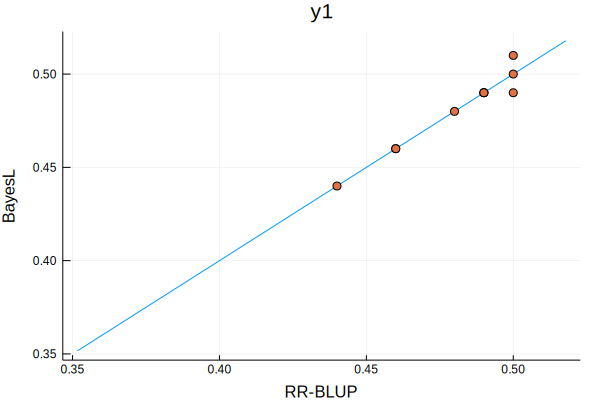

In [31]:
plot(x->x,minVal,maxVal,lab="",title="y1")
scatter!(resCorr[:,3],resCorr[:,1],xlabel="RR-BLUP",ylabel="BayesL",lab="")

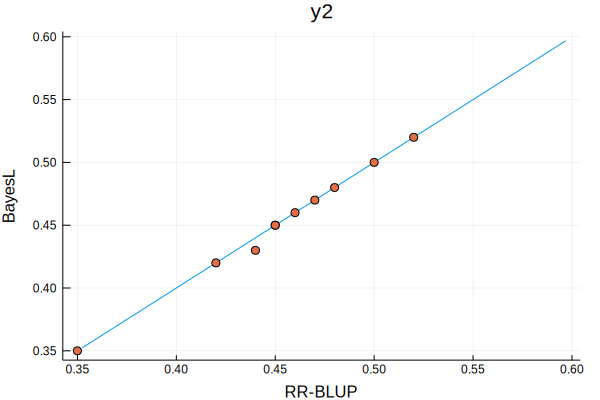

In [32]:
plot(x->x,0.35,0.6,title="y2",lab="")
scatter!(resCorr[:,4],resCorr[:,2],xlabel="RR-BLUP",ylabel="BayesL",lab="")

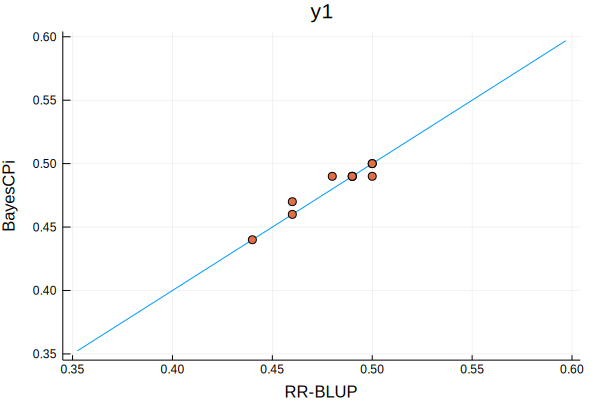

In [33]:
plot(x->x,0.35,0.6,title="y1",lab="")
scatter!(resCorr[:,3],resCorr[:,5], xlabel="RR-BLUP",ylabel="BayesCPi",lab="")

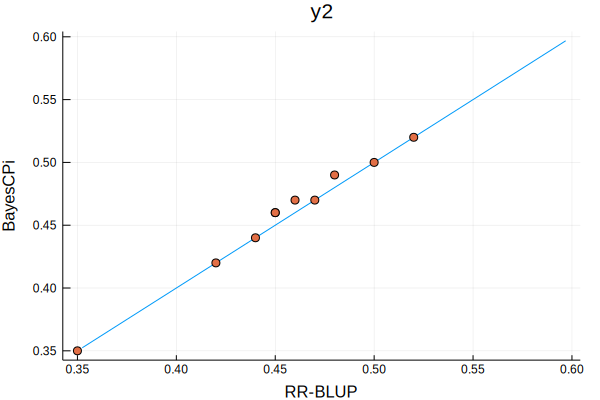

In [34]:
plot(x->x,0.35,0.6,title="y2",lab="")
scatter!(resCorr[:,4],resCorr[:,6], xlabel="RR-BLUP",ylabel="BayesCPi",lab="")

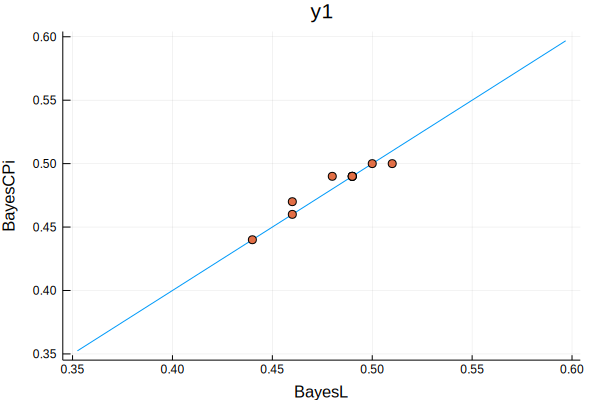

In [35]:
plot(x->x,0.35,0.6,title="y1",lab="")
scatter!(resCorr[:,1],resCorr[:,5], xlabel="BayesL",ylabel="BayesCPi",lab="")

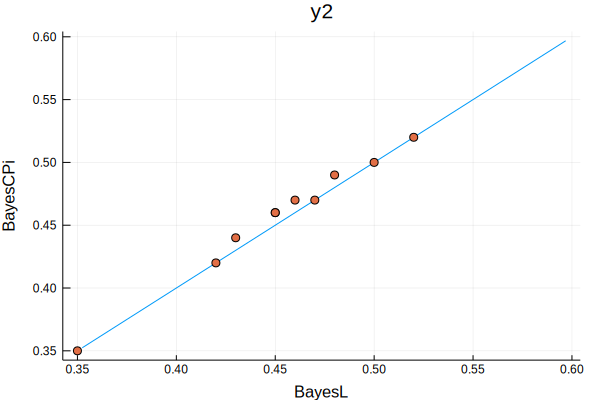

In [36]:
plot(x->x,0.35,0.6,title="y2",lab="")
scatter!(resCorr[:,2],resCorr[:,6], xlabel="BayesL",ylabel="BayesCPi",lab="")